In [2]:
import pandas as pd

antennas = pd.read_csv("data/external/antennas.csv")
installations = pd.read_csv("data/external/installations.csv")
sites = pd.read_csv("data/external/sites.csv")
antennas.rename(columns={"id" : "antenna_id", "name" : "antenna_name"}, inplace=True)
sites.rename(columns={"id" : "site_id", "name" : "site_abrev_name", "basename" : "site_name", "code" : "site_code"}, inplace=True)
data = pd.merge(installations, antennas, on="antenna_id", how="left")
final_data = pd.merge(data, sites, on="site_id", how="left").set_index("id")

In [15]:
sites[sites.site_abrev_name=="LUX"][["latitude", "longitude"]].values

array([[49.624928,  6.150548]])

In [12]:
final_data.site_abrev_name.unique()

: 

In [35]:
final_data[(final_data.end_at>"2024-05-01") & (final_data.start_at<"2024-05-31")]

,site_id,antenna_id,start_at,end_at,comment,type,antenna_name,owned,description,site_abrev_name,site_code,site_name,latitude,longitude,ref_altitude
id,,,,,,,,,,,,,,,
3,3,2,2023-03-01 00:00:00,2024-06-03 23:59:59,1st installation on ECTL LUX premises.,AEROSCOPEv2,0QRDJCAR037P0N,True,From CDG.,LUX,8FX8J5F2+X6,Luxembourg,49.624928,6.150548,376.0
7,7,1,2023-11-16 00:00:00,2024-10-17 23:59:59,Belfast to London.,AEROSCOPEv1,0QRDE8F0010496,True,Original antenna from EIH.,LON,9C3XGW9R+5H,London,51.517952,-0.058616,6.0
8,8,3,2024-02-21 00:00:00,2024-08-27 23:59:59,BRU antenna to Cyprus.,AEROSCOPEv2,0QRDKC2R03J32P,True,3rd bought.,CYP,8G6MVJGJ+JJ,Cyprus,34.876556,33.631530,3.0
10,10,4,2024-04-09 00:00:00,2050-12-30 23:00:00,HQ to Vienna airport.,AEROSCOPEv2,0QRDKC2R038370,True,In BDX.,AUS,8FWR4H3Q+MR,Vienna,48.104230,16.589588,183.0
15,2,8,2024-02-14 00:00:00,2024-07-11 23:59:59,New antenna in CDG.,AEROSCOPEv2,0QRDJCAR0383TD,False,New antenna from ASD,CDG,8FX42H58+X9,Bretigny,49.009910,2.565982,119.0


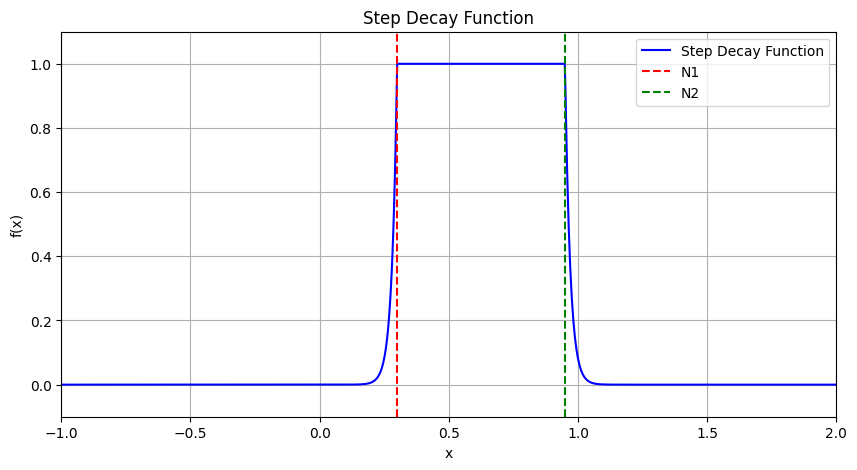

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def step_decay(x, N1, N2, alpha):
    if N1 <= x <= N2:
        return 1
    elif x < N1:
        return np.exp(-alpha * (N1 - x))
    else:  # x > N2
        return np.exp(-alpha * (x - N2))

# Parameters
N1 = 0.3
N2 = 0.95
alpha = 50

# Generate x values
x_values = np.linspace(-1, 2, 1000)
y_values = [step_decay(x, N1, N2, alpha) for x in x_values]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label='Step Decay Function', color='blue')
plt.axvline(N1, color='red', linestyle='--', label='N1')
plt.axvline(N2, color='green', linestyle='--', label='N2')
plt.title('Step Decay Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-0.1, 1.1)
plt.xlim(-1, 2)
plt.legend()
plt.grid()
plt.show()


In [2]:
import os
import pandas as pd

# Define the root folder
root_folder = 'data/external/adsb/site=ZUR/'

# List to hold individual DataFrames
dataframes = []

# Walk through the directory structure
for subdir, _, files in os.walk(root_folder):
    for file in files:
        # Check if the file is a Parquet file
        if file.endswith('.parquet'):
            file_path = os.path.join(subdir, file)
            # Read the Parquet file into a DataFrame
            df = pd.read_parquet(file_path)
            dataframes.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Show the combined DataFrame
print(combined_df)


MemoryError: Unable to allocate 16.6 GiB for an array with shape (7, 318876288) and data type object